<a href="https://colab.research.google.com/github/PranjalMinocha/JPLasteroid/blob/main/Week%201/AdityanS_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the Environment

## Install Packages
All required packages are already available in Colab. If running local, make sure to install the necessary packages.

In [1]:
%pip install numpy
%pip install pandas
%pip install plotly
%pip install kaggle
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install dash
%pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 33.3 MB/s 
     |████████████████████████████████| 357 kB 70.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 67.2 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=fc6a8f403d023a250b21d2c119ac2d8cb96a6169f1730fde85a097c0efd6a4bb
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
pio.renderers.default = "colab"

## Stylizing Plots

In [3]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

In [4]:
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [5]:
#A list of hex colours running between blue and purple
CB91_Grad_BP = ['#2cbdfe', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']

In [6]:
sns.set(font='DejaVu Sans',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

In [7]:
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

In [8]:
## Some extra functions
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist()}

# Dataset

We will use the data set officially maintained by Jet Propulsion Laboratory of California Institute of Technology which is an organization under NASA. [JPL Small-Body Database Search Engine](https://ssd.jpl.nasa.gov/tools/sbdb_query.html)

### Setting up Kaggle API Token

Assuming kaggle.json file exists in the current working directory.

In [9]:
%mkdir ~/.kaggle
%mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

### Download Dataset from Kaggle

In [10]:
%mkdir asteroids
!kaggle datasets download basu369victor/prediction-of-asteroid-diameter -p ./asteroids/ --unzip
%ls -l asteroids/

 95% 153M/161M [00:00<00:00, 228MB/s]
100% 161M/161M [00:00<00:00, 204MB/s]
total 362692
-rw-r--r-- 1 root root 170117548 Sep  1 16:25 Asteroid.csv
-rw-r--r-- 1 root root 201277388 Sep  1 16:25 Asteroid_Updated.csv


## Import Dataset using `pandas`

In [11]:
dataset_filename = './asteroids/Asteroid_Updated.csv'
df = pd.read_csv(dataset_filename)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.



# Exploratory Data Analysis

## General Overview

### Structure of `pandas.Dataframe`

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

In [13]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [14]:
df.tail()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134
839713,NaN,2.546442,0.287672,5.356238,70.709555,273.483265,1.813901,3.278983,4.063580,11.0,...,NaN,NaN,NaN,NaN,NaN,0.815280,MBA,0.242551,1484.222588,20.432959


- 31 features with 8,39,714 entries. 

## Data Distributions

In [15]:
df_na = pd.DataFrame()
df_na['features'] = list(df.columns)
df_na['nulls'] = list(df.isna().sum())
df_na['uniques'] = list(df.nunique())
df_na

,features,nulls,uniques
0,name,817747,21967
1,a,2,839702
2,e,0,839644
3,i,0,839623
4,om,0,839712
5,w,0,839709
6,q,0,839706
7,ad,6,839697
8,per_y,1,839697
9,data_arc,15474,21913


- Null Value Heatmap

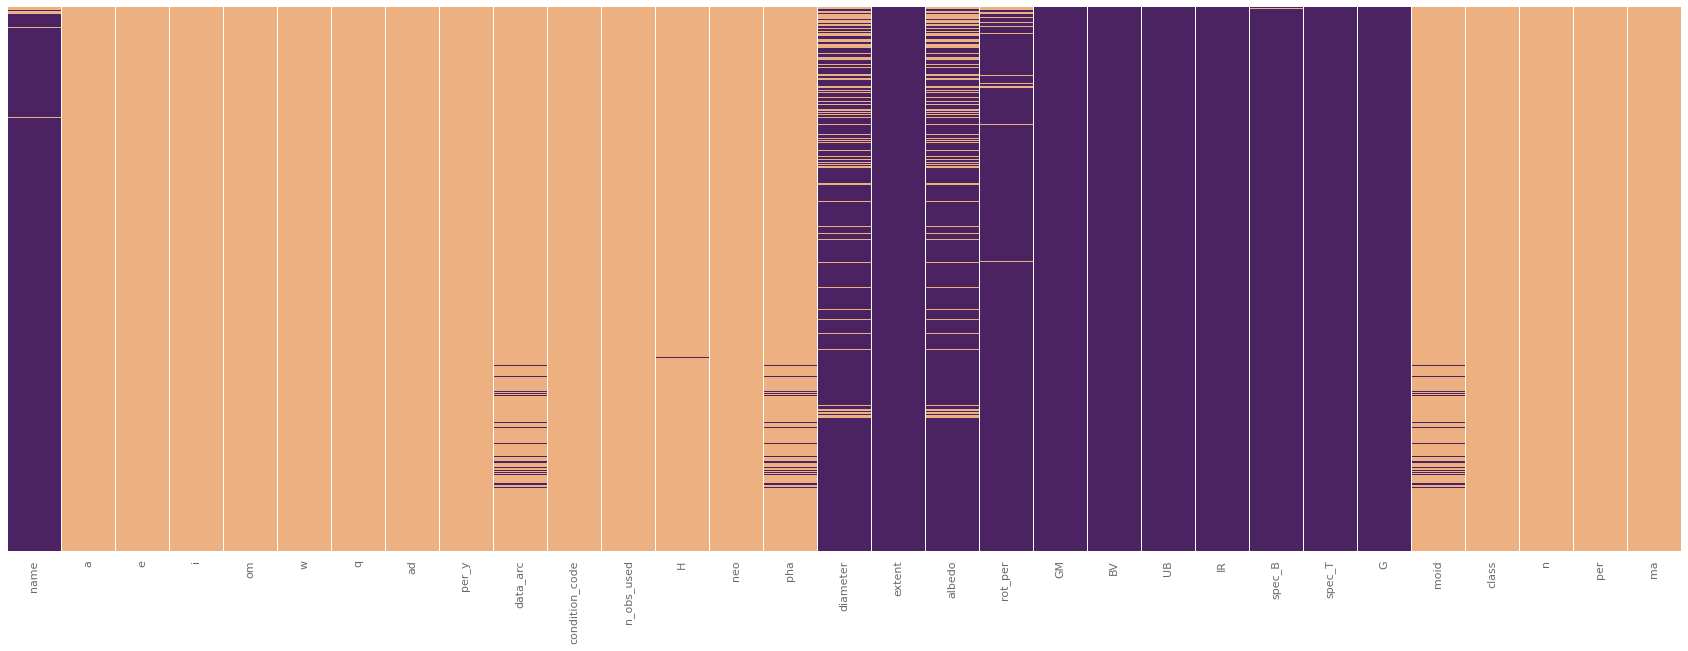

In [32]:
plt.figure(figsize=(30,10))
fig = sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='flare')

- Data Histogram

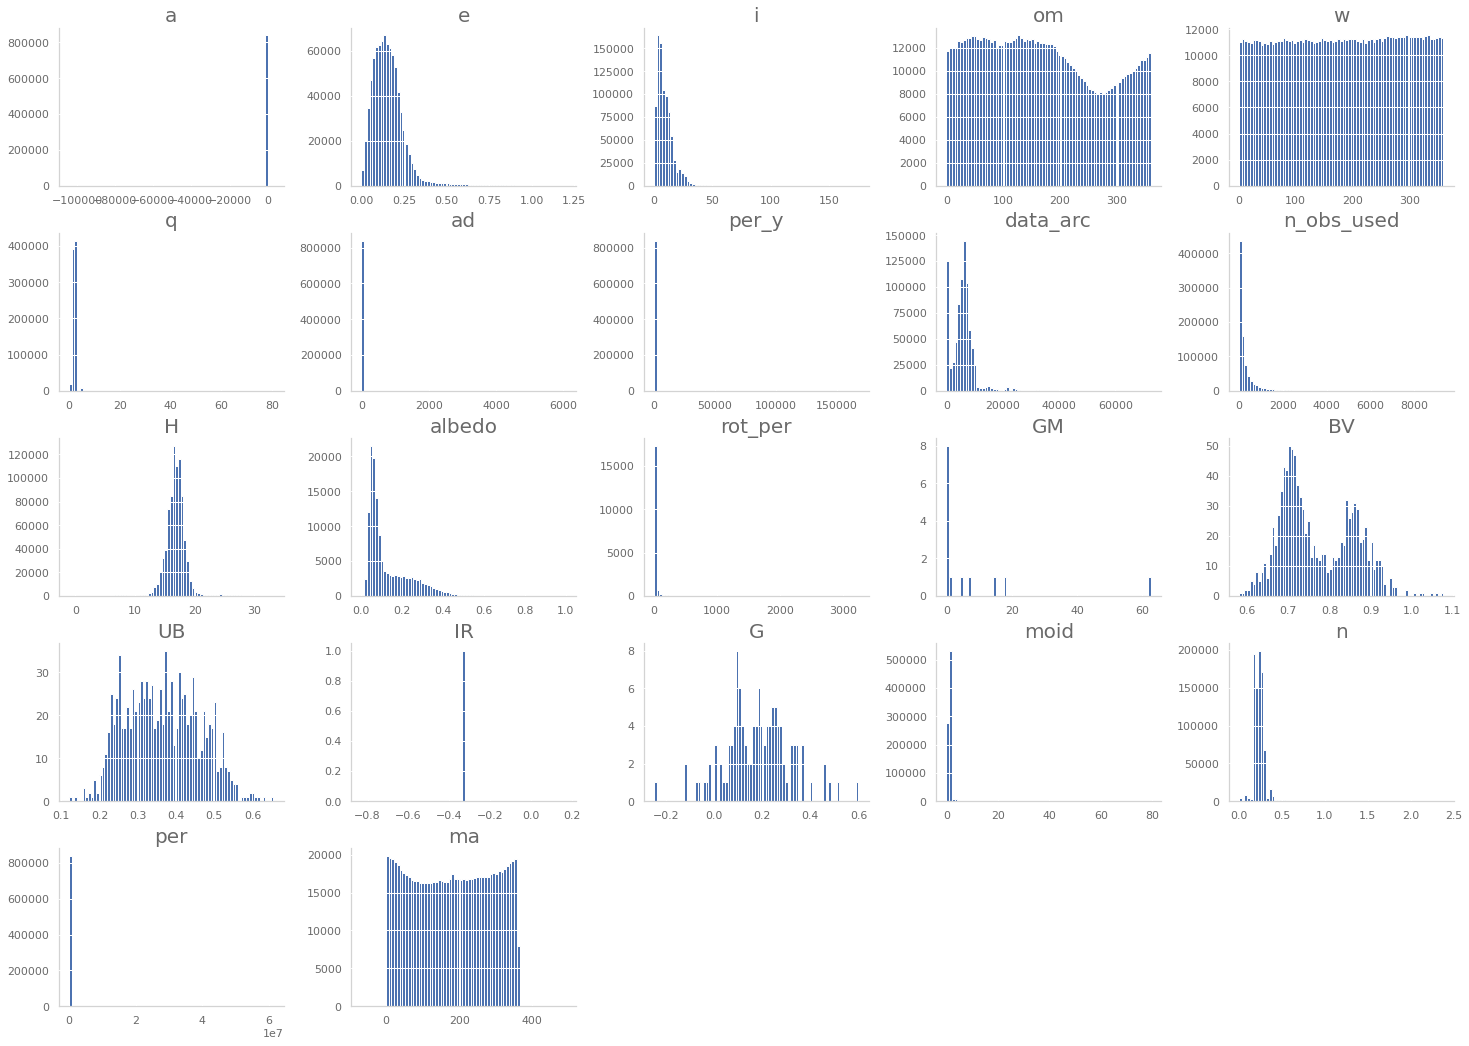

In [27]:
df.hist(bins=75,figsize=(25,18))
plt.show()

- Correlation Matrix

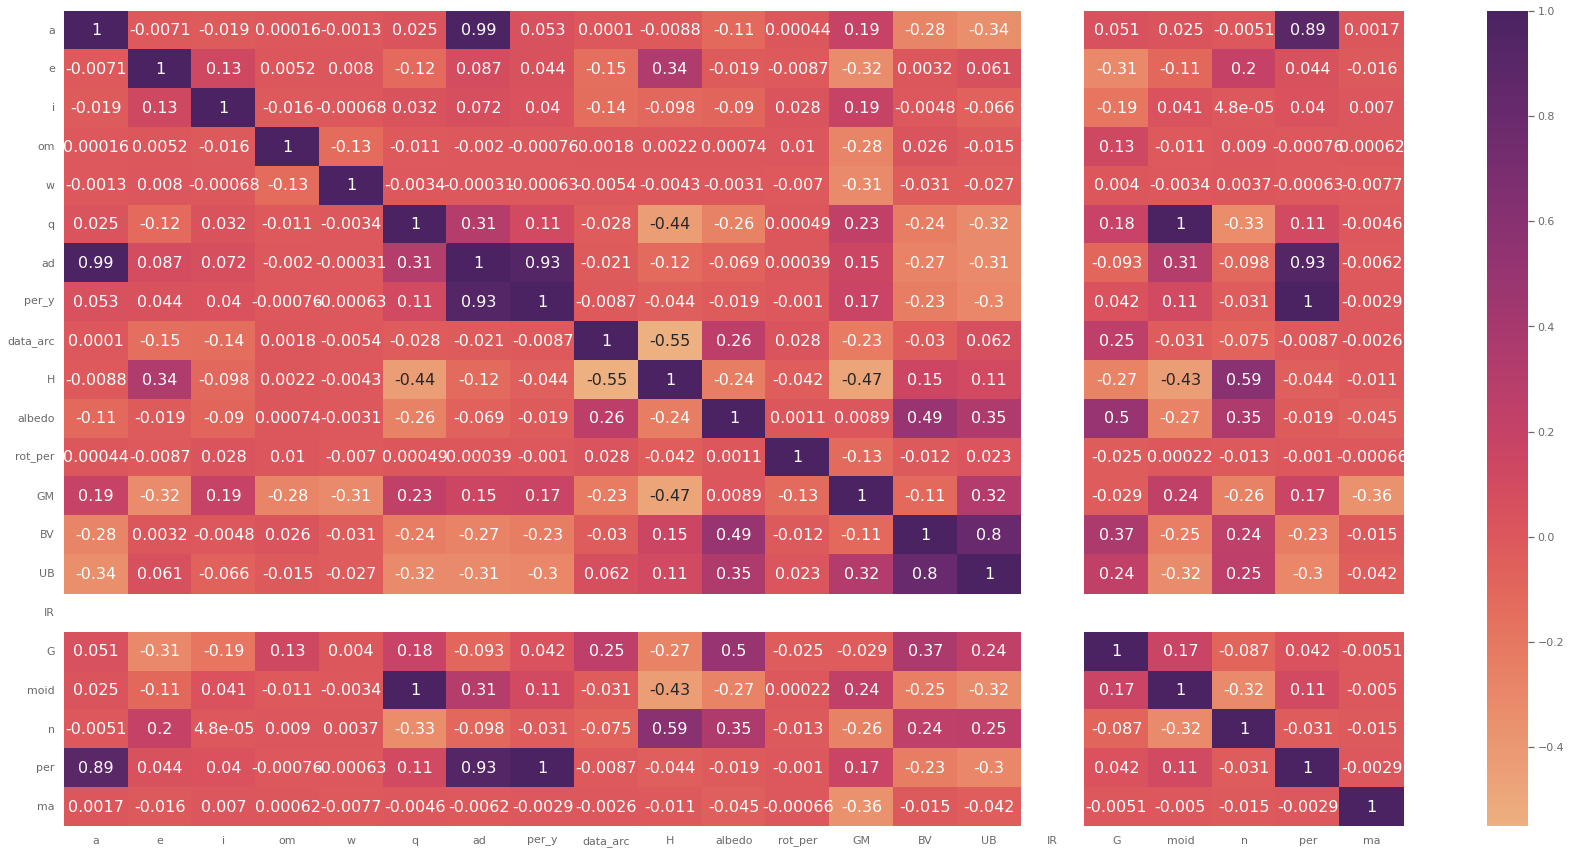

In [31]:
plt.figure(figsize=(30,15))
fig = sns.heatmap(df.select_dtypes(include='float64').corr(), cbar=True, cmap='flare', annot=True)